# Introduction
Data drift occurs when there are differences in the distributions of training and test datasets. Maybe there are different classes or instances in the test set, or maybe the test set was collected later, and things have changed since then. Sometimes data drift can be difficult to detect. We saw this in the February TPS competition where bacteria had mutated in the test dataset meaning that the same bacteria had slightly different variable distributions in the test set compared to the training set. This makes prediction difficult as the model is fitted on different data.

This dataset is useful to explore the adversarial validation concept as the data has:

* one variable that is mutually exclusive between training and test datasets,
* a few categorical variables with some overlap, but some values occur exclusively in the training and test sets, and
* variables with more subtle distributional differences
Let's get started by reading in the data and having a look:

In [2]:
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sample = pd.read_csv('sample_submission.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

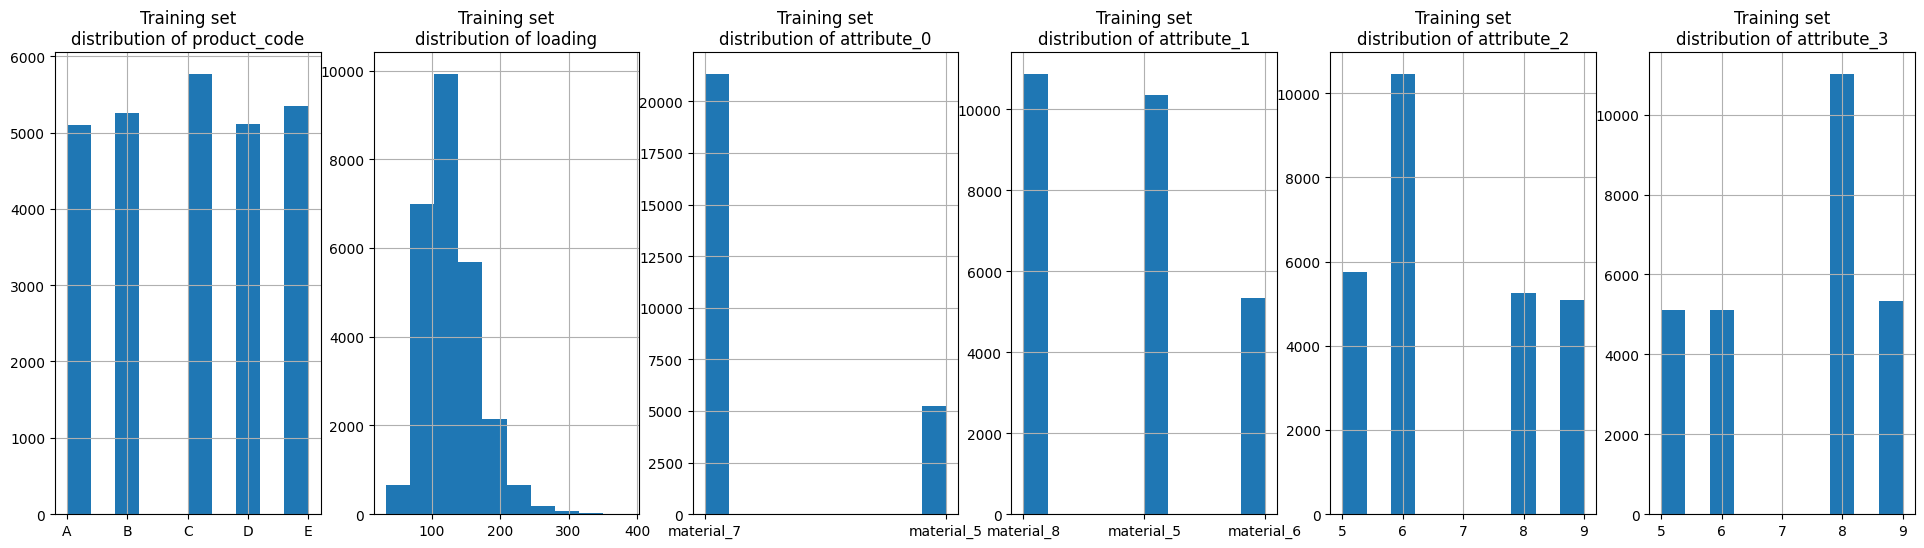

In [3]:
plt.figure(figsize=(24,6))
for i in range(6):
    plt.subplot(1,6,i+1)
    train[train.columns[i+1]].hist()
    plt.title(f'Training set\ndistribution of {train.columns[i+1]}')

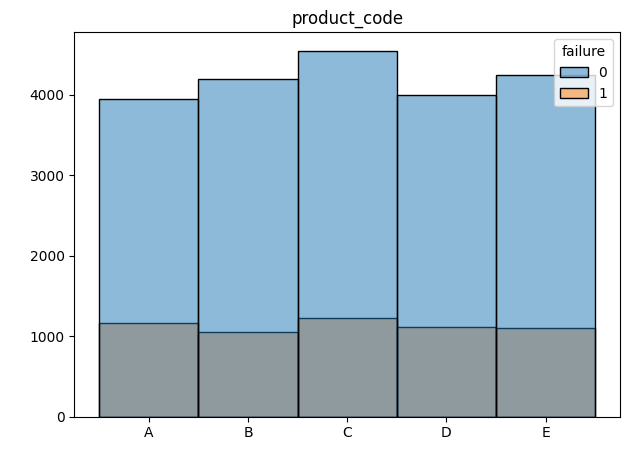

In [12]:
sns.histplot(data=train,x=train['product_code'],hue=train['failure'], color='blue', fill='black')
plt.title('product_code', color = 'black')
plt.ylabel(" ")
plt.xlabel(" ")
plt.tight_layout()

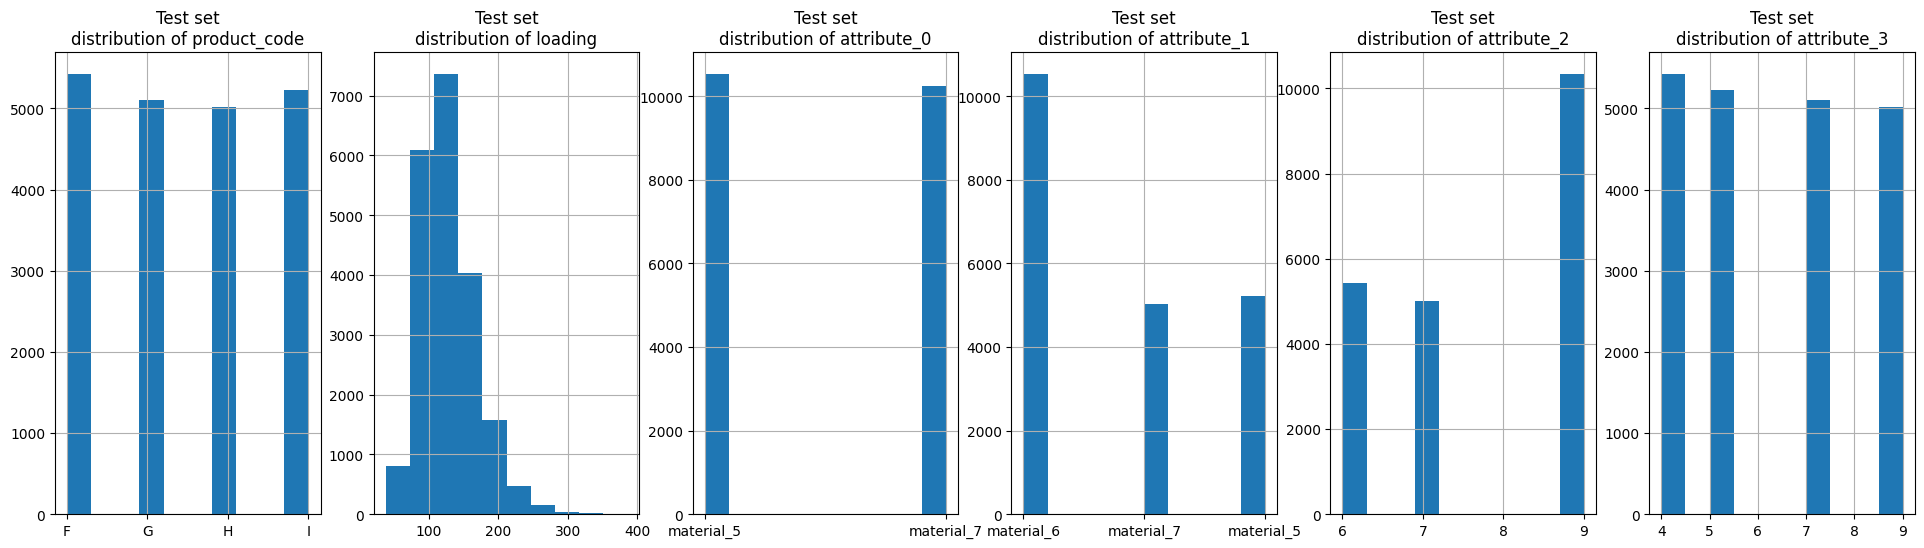

In [5]:
plt.figure(figsize=(24,6))
for i in range(6):
    plt.subplot(1,6,i+1)
    test[test.columns[i+1]].hist()
    plt.title(f'Test set\ndistribution of {test.columns[i+1]}')

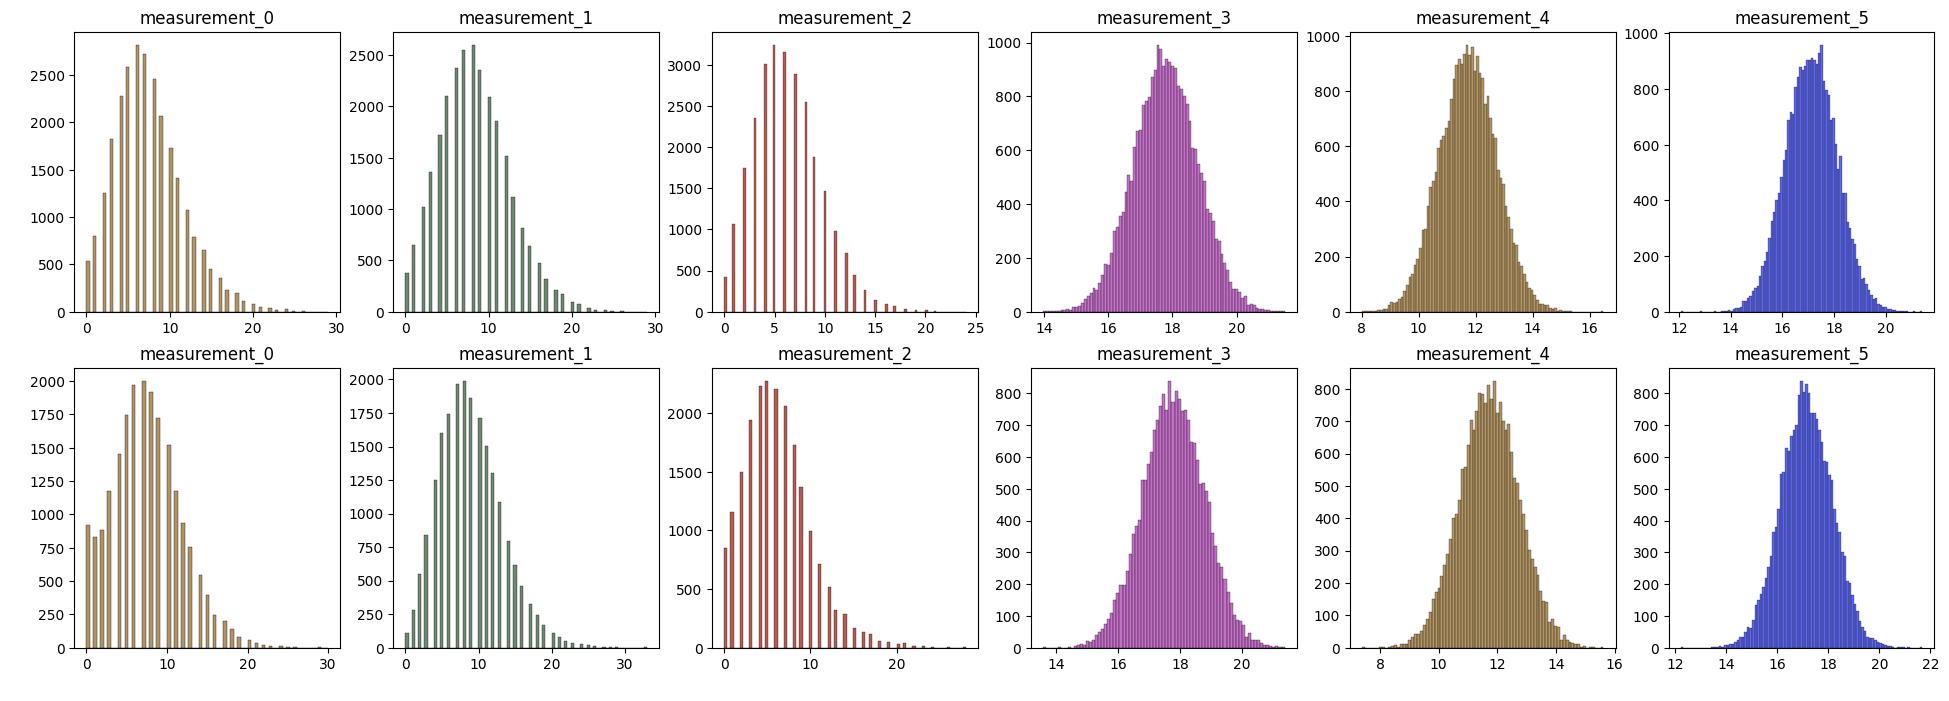

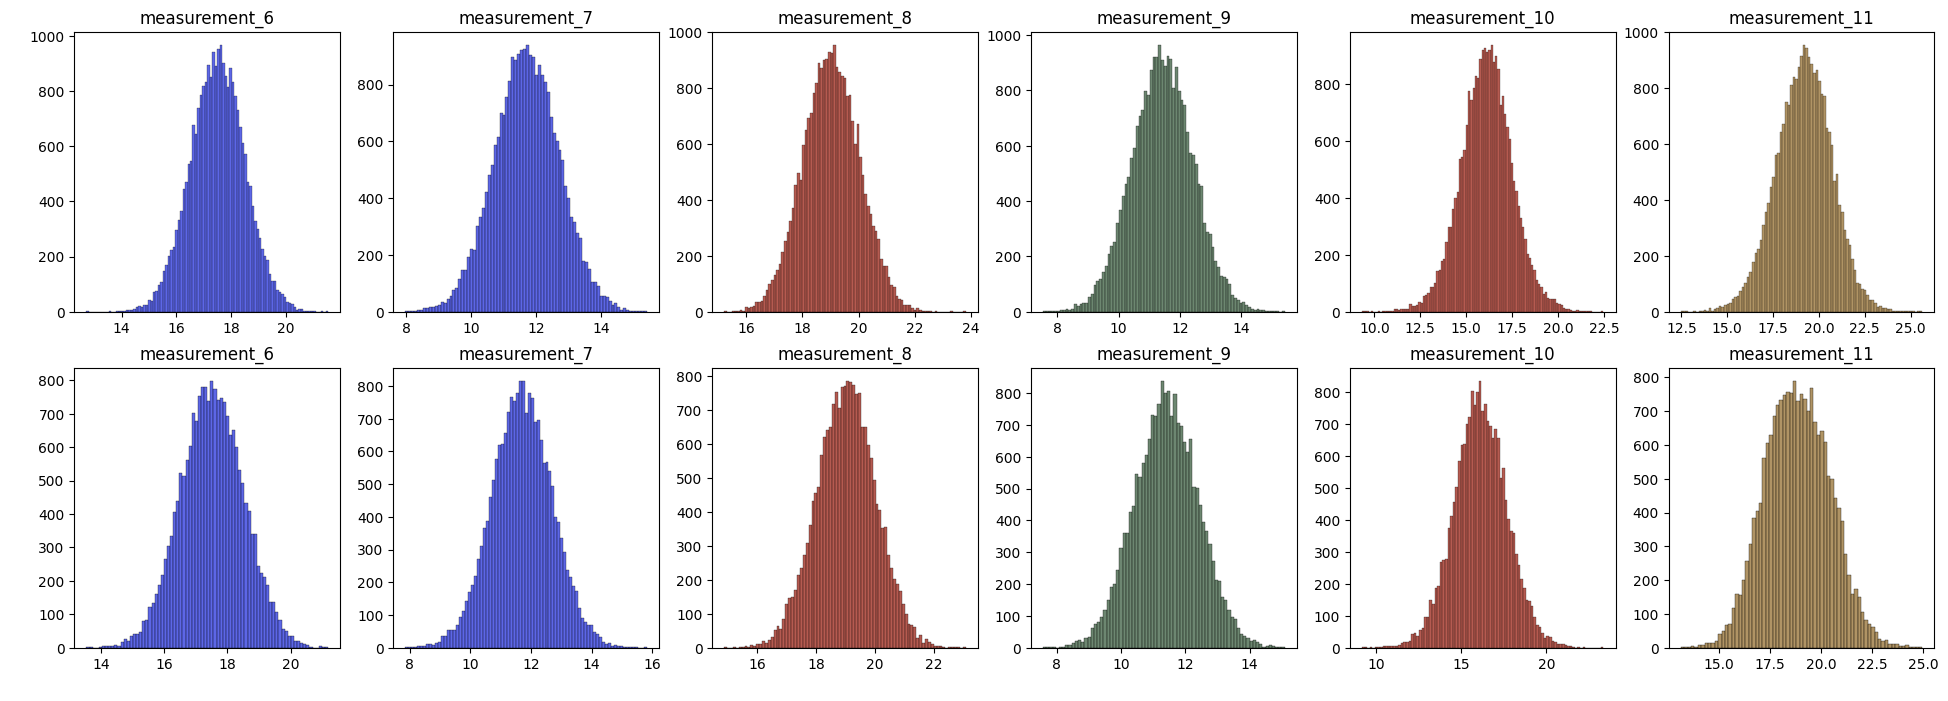

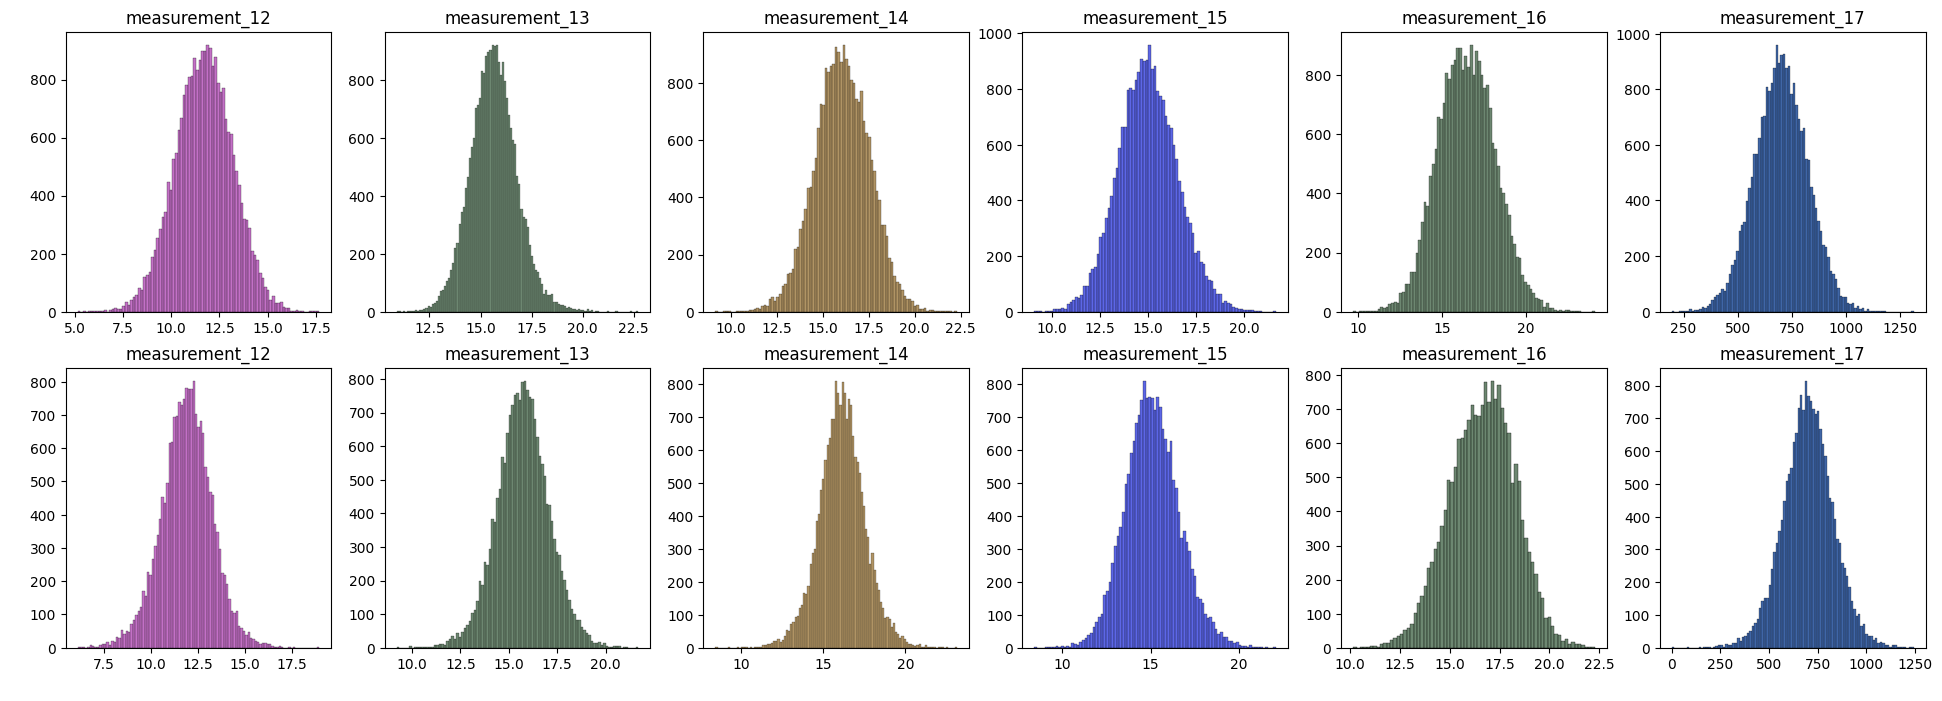

In [6]:
color_ = [ '#9D2417', '#AF41B4', '#003389' ,'#3C5F41',  '#967032', '#2734DE'] 
for i in range(3):
    plt.figure(figsize=(24, 8))
    for j in range(6):
        rand_col = color_[random.sample(range(6), 1)[0]]
        plt.subplot(2, 6, j+1)
        plot_data = train[f'measurement_{(6 * i) + j}']
        sns.histplot(data=plot_data, x=train[f'measurement_{(6 * i) + j}'], color=rand_col)
        plt.title(f'{train.columns[7 + (6 * i) + j]}', color='black')
        plt.ylabel(" ")
        plt.xlabel(" ")
        
        plt.subplot(2, 6, j+1+6)
        plot_data = test[f'measurement_{(6 * i) + j}']
        sns.histplot(data=plot_data, x=test[f'measurement_{(6 * i) + j}'], color=rand_col)
        plt.title(f'{train.columns[7 + (6 * i) + j]}', color='black')
        plt.ylabel(" ")
        plt.xlabel(" ")
    plt.show()

## 試著將圖形疊在一起

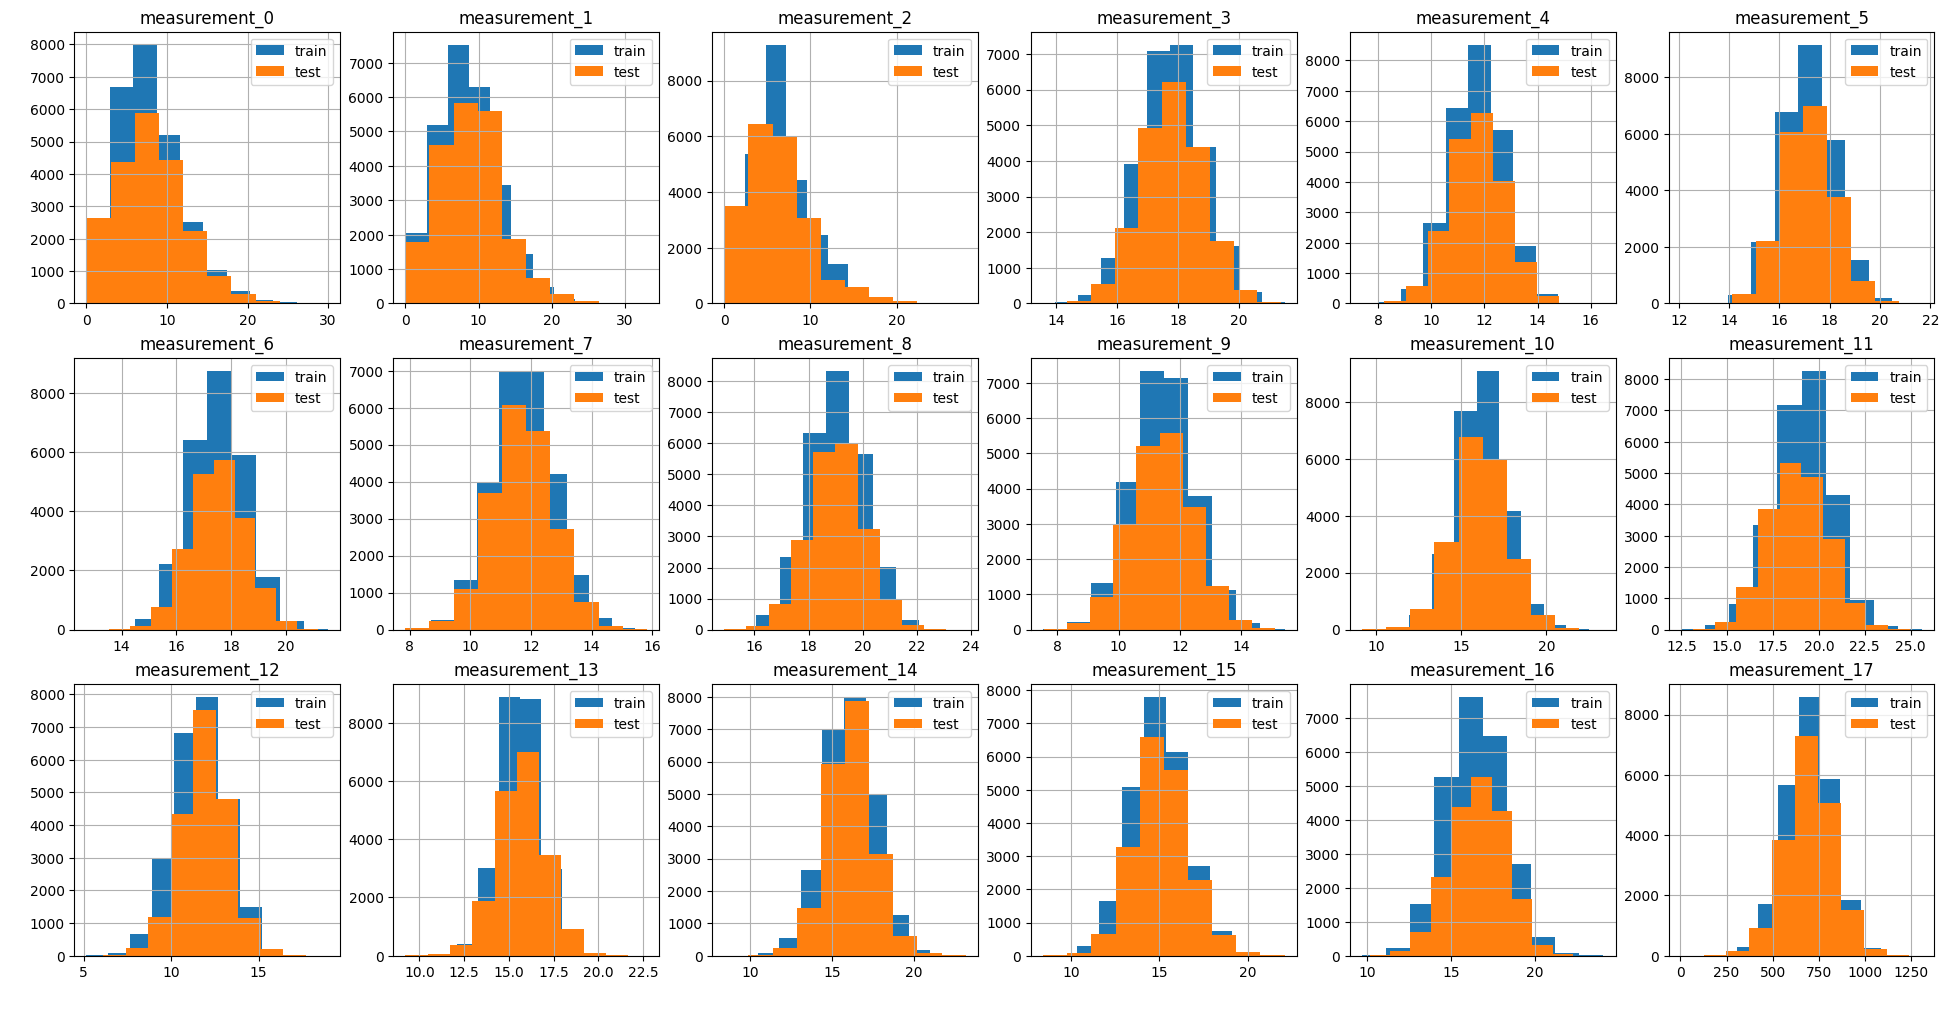

In [7]:
plt.figure(figsize=(24, 12))
for i in range(18):
    rand_col = color_[random.sample(range(6), 1)[0]]
    plt.subplot(3, 6, i+1)
    train[f'measurement_{i}'].hist(figsize=(24,12))
    plt.title(f'{train.columns[7 + i]}', color='black')
    plt.ylabel(" ")
    plt.xlabel(" ")
    plt.subplot(3, 6, i+1)
    test[f'measurement_{i}'].hist(figsize=(24,12))
    plt.legend(['train', 'test'])
plt.show()

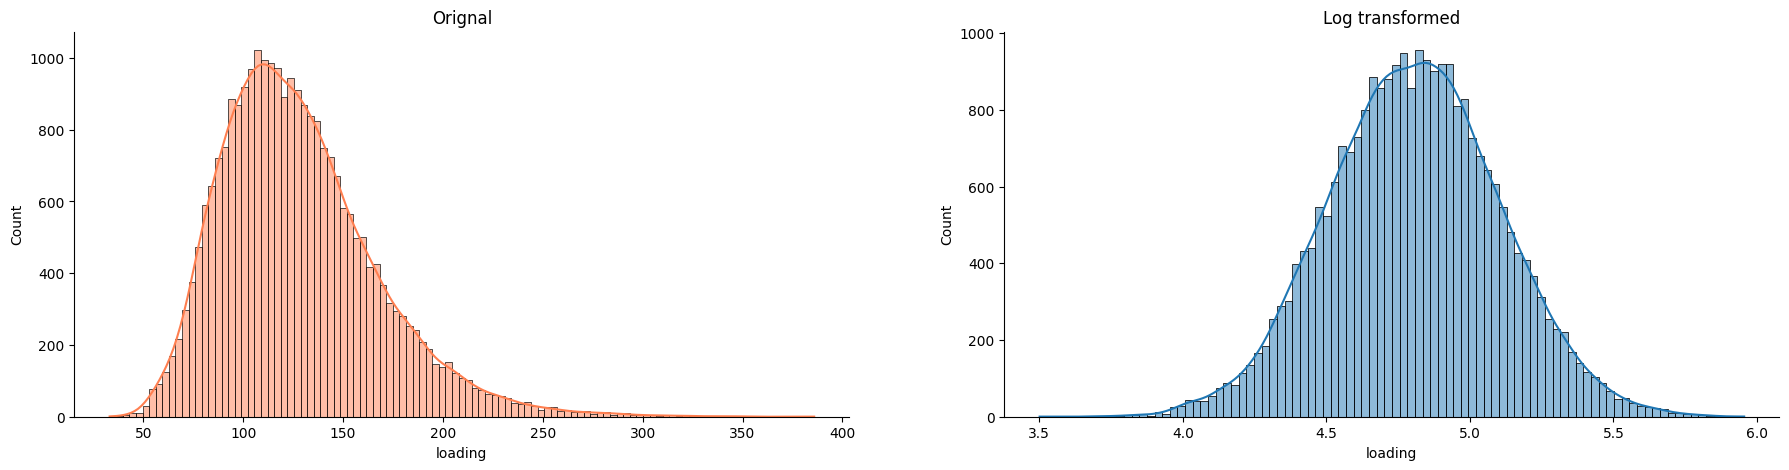

In [8]:
## training data

plt.figure(figsize= (22,5))
plt.subplot(1,2,1)
sns.histplot(train['loading'],kde=True,color='coral')
plt.title("Orignal")
plt.subplot(1,2,2)
sns.histplot(np.log(train["loading"]),kde=True)
plt.title("Log transformed")
sns.despine()